## 1-й Датасет: Pima Indians Diabetes Database

https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

Этот набор данных получен Национальным институтом диабета, болезней органов пищеварения и почек. Цель набора данных - диагностически предсказать, есть ли у пациента диабет, на основе определенных диагностических измерений, включенных в набор данных. При отборе этих случаев из более обширной базы данных было наложено несколько ограничений. В частности, все пациенты здесь - женщины не моложе 21 года индейского происхождения Пима.

* Из описания датасета очевидно, что объектами иследования являются женьщины индейци пима.
* Атрибуты объектов: Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
* Очевидная цель этого датасета - научиться предсказывать диабет.

В качестве примера бизнес-целей можно привести:
* Повышение качества жизни пациентов. Цель технического проекта: Разработать интерфейс для модели, который будет предоставлять пациентам персонализированные рекомендации по профилактике и лечению диабета на основе их индивидуальных рисков, определенных моделью.
* Повышение эффективности скрининга диабета. Цель технического проекта: Разработать и обучить модель машинного обучения с точностью предсказания не менее 85% для автоматизированного скрининга диабета на основе данных датасета "Диабет у индейцев Пима".
*  Снижение медицинских расходов. Цель технического проекта: Оптимизировать модель прогнозирования таким образом, чтобы минимизировать количество ложноотрицательных результатов (пациенты с диабетом, которые не были выявлены), что позволит снизить затраты на лечение осложнений.

In [1]:
import pandas as pd
df = pd.read_csv(".//static//csv//diabetes.csv", sep=",")
print('количество колонок: ' + str(df.columns.size))  
print('колонки: ' + ', '.join(df.columns))

df.info()
df.head()

количество колонок: 9
колонки: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

# Получение сведений о пропущенных данных

Типы пропущенных данных:

* None - представление пустых данных в Python
* NaN - представление пустых данных в Pandas
* '' - пустая строка

In [2]:
# Количество пустых значений признаков
print(df.isnull().sum())

print()

# Есть ли пустые значения признаков
print(df.isnull().any())

print()

# Процент пустых значений признаков
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df) * 100
    if null_rate > 0:
        print(f"{i} процент пустых значений: %{null_rate:.2f}")

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool



Судя по статистике выше, пустые значения отсутсвуют. Проверим датасет на выбросы:

Количество выбросов в столбце 'Pregnancies': 4
Количество выбросов в столбце 'Glucose': 5
Количество выбросов в столбце 'BloodPressure': 45


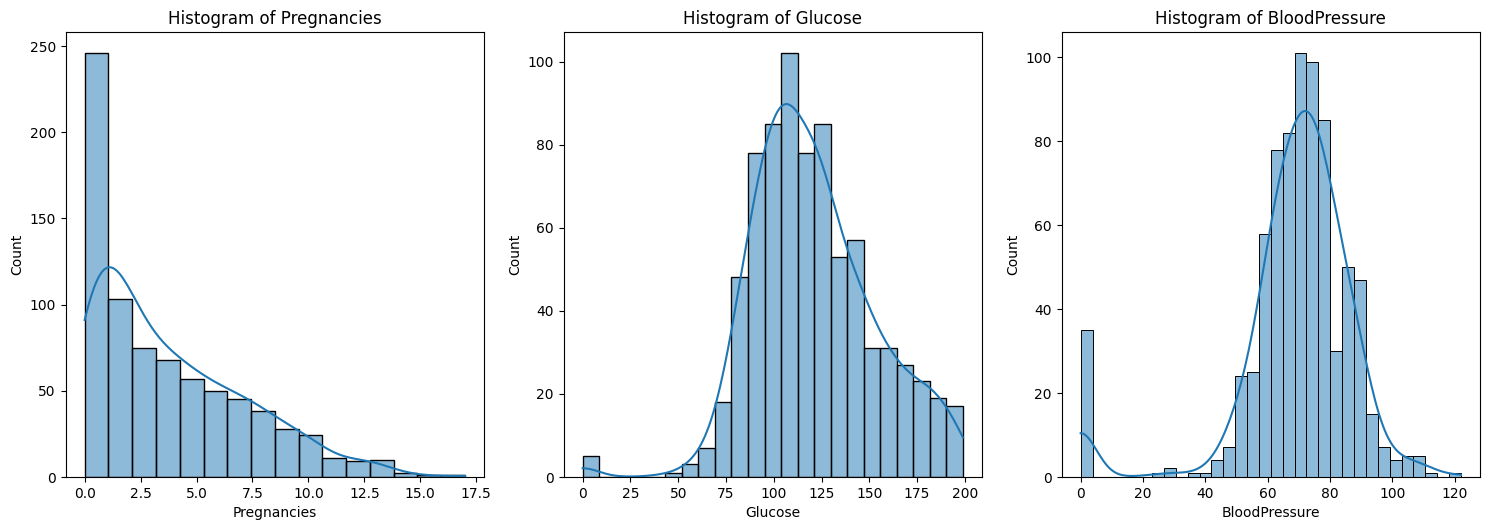

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(".//static//csv//diabetes.csv")

# Выбираем числовые столбцы
numeric_columns = ['Pregnancies', 'Glucose', 'BloodPressure']

# Выбираем столбцы для анализа
columns_to_check = ['Pregnancies', 'Glucose', 'BloodPressure']

# Функция для подсчета выбросов
def count_outliers(df, columns):
    outliers_count = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Считаем количество выбросов
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_count[col] = len(outliers)
    
    return outliers_count

# Подсчитываем выбросы
outliers_count = count_outliers(df, columns_to_check)

# Выводим количество выбросов для каждого столбца
for col, count in outliers_count.items():
    print(f"Количество выбросов в столбце '{col}': {count}")
    
# Создаем гистограммы
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

В принципе, количество выбросов для солбцов 'Pregnancies' и 'Glucose' не так критично, что нельзя сказать про столбец 'BloodPressure'. Сделаем очистку от выбросов для данного столбца:

Количество удаленных строк: 45
Количество выбросов в столбце 'BloodPressure': 4


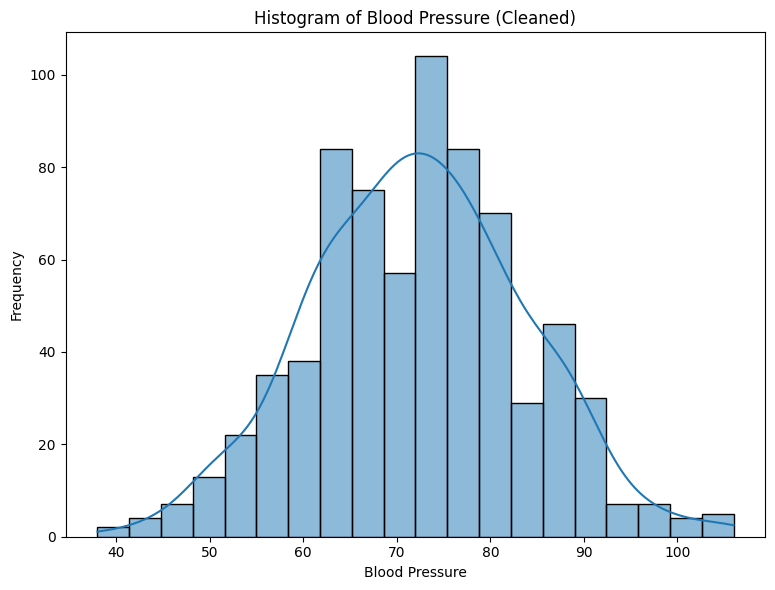

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
   
# Выбираем столбцы для очистки
columns_to_clean =  ['BloodPressure']

# Функция для удаления выбросов
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Удаляем строки, содержащие выбросы
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Удаляем выбросы
df_cleaned = remove_outliers(df, columns_to_clean)

# Выводим количество удаленных строк
print(f"Количество удаленных строк: {len(df) - len(df_cleaned)}")

df = df_cleaned

# Выбираем столбцы для анализа
columns_to_check = ['BloodPressure']

# Функция для подсчета выбросов
def count_outliers(df, columns):
    outliers_count = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Считаем количество выбросов
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_count[col] = len(outliers)
    
    return outliers_count

# Подсчитываем выбросы
outliers_count = count_outliers(df, columns_to_check)

# Выводим количество выбросов для каждого столбца
for col, count in outliers_count.items():
    print(f"Количество выбросов в столбце '{col}': {count}")
 

# Создаем гистограммы для очищенных данных
plt.figure(figsize=(15, 6))

# Гистограмма для relative_velocity
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['BloodPressure'], kde=True)
plt.title('Histogram of Blood Pressure (Cleaned)')
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Судя по данным на диаграмме выше, количество выбросов значительно сократилось и не превышает допустимые диапозоны. Теперь можно приступить к разбиению датасета на выборки:

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Разделение на признаки (X) и целевую переменную (y)
X = df.drop('Outcome', axis=1)  # Признаки
y = df['Outcome']  # Целевая переменная

# Разбиение на обучающую и оставшуюся часть (контрольная + тестовая)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Разбиение оставшейся части на контрольную и тестовую выборки
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Вывод размеров выборок
print("Размер обучающей выборки:", X_train.shape[0])
print("Размер контрольной выборки:", X_val.shape[0])
print("Размер тестовой выборки:", X_test.shape[0])

Размер обучающей выборки: 433
Размер контрольной выборки: 145
Размер тестовой выборки: 145


In [8]:
from sklearn.model_selection import train_test_split

# Разделение на признаки (X) и целевую переменную (y)
X = df.drop('Outcome', axis=1)  # Признаки
y = df['Outcome']  # Целевая переменная

# Разбиение на обучающую и оставшуюся часть (контрольная + тестовая)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Разбиение оставшейся части на контрольную и тестовую выборки
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Функция для проверки сбалансированности выборок
def check_balance(y_train, y_val, y_test):
    print("Сбалансированность обучающей выборки:")
    print(y_train.value_counts(normalize=True))
    
    print("\nСбалансированность контрольной выборки:")
    print(y_val.value_counts(normalize=True))
    
    print("\nСбалансированность тестовой выборки:")
    print(y_test.value_counts(normalize=True))

# Проверка сбалансированности
check_balance(y_train, y_val, y_test)

Сбалансированность обучающей выборки:
Outcome
0    0.658199
1    0.341801
Name: proportion, dtype: float64

Сбалансированность контрольной выборки:
Outcome
0    0.655172
1    0.344828
Name: proportion, dtype: float64

Сбалансированность тестовой выборки:
Outcome
0    0.662069
1    0.337931
Name: proportion, dtype: float64


По данным выше можно понять, что выборки сбалансиированы относительно. Воспользуемся приращением данных методом выборки с избытком (oversampling)

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Разделение на признаки (X) и целевую переменную (y)
X = df.drop('Outcome', axis=1)  # Признаки
y = df['Outcome']  # Целевая переменная

# Разбиение на обучающую и оставшуюся часть (контрольная + тестовая)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Разбиение оставшейся части на контрольную и тестовую выборки
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Применение SMOTE для балансировки обучающей выборки
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Функция для проверки сбалансированности выборок
def check_balance(y_train, y_val, y_test):
    print("Сбалансированность обучающей выборки:")
    print(y_train.value_counts(normalize=True))
    
    print("\nСбалансированность контрольной выборки:")
    print(y_val.value_counts(normalize=True))
    
    print("\nСбалансированность тестовой выборки:")
    print(y_test.value_counts(normalize=True))

# Проверка сбалансированности после SMOTE
print("Сбалансированность обучающей выборки после SMOTE:")
print(y_train_resampled.value_counts(normalize=True))

# Проверка сбалансированности контрольной и тестовой выборок
check_balance(y_train_resampled, y_val, y_test)

Сбалансированность обучающей выборки после SMOTE:
Outcome
0    0.5
1    0.5
Name: proportion, dtype: float64
Сбалансированность обучающей выборки:
Outcome
0    0.5
1    0.5
Name: proportion, dtype: float64

Сбалансированность контрольной выборки:
Outcome
0    0.655172
1    0.344828
Name: proportion, dtype: float64

Сбалансированность тестовой выборки:
Outcome
0    0.662069
1    0.337931
Name: proportion, dtype: float64


Выборка сбалансирована

## 2-й Датасет: Starbucks Stock Price Dataset 📊🍵🧋🔥

Starbucks Corporation - всемирно известная сеть кофеен, основанная в 1971 году в Сиэтле, штат Вашингтон, Джерри Болдуином, Зевом Сиглом и Гордоном Боукером. Начав со скромного магазина, торгующего высококачественными кофейными зернами и оборудованием, Starbucks превратилась в одну из крупнейших в мире сетей кофеен с тысячами магазинов по всему миру. Известная своим кофе высшего сорта, инновационными напитками и уникальным обслуживанием клиентов, Starbucks стала культурной иконой кофейной индустрии.

Этот набор данных предоставляет исчерпывающую информацию об изменениях цен на акции Starbucks за последние 25 лет. Он включает в себя важные столбцы, такие как дата, цена открытия, самая высокая цена дня, самая низкая цена дня, цена закрытия, скорректированная цена закрытия и объем торгов.

Эти данные бесценны для проведения исторического анализа, прогнозирования динамики акций в будущем и понимания рыночных тенденций, связанных с акциями Starbucks.

* Из описания датасета очевидно, что объектами иследования являются  записи о динамике цены акций.
* Атрибуты объектов: Date,Open,High,Low,Close,Adj Close,Volume
* Очевидная цель этого датасета - научиться предсказывать цены на акции.

В качестве примера бизнес-целей можно привести:
* Предсказание будущих цен акций: Использовать исторические данные для прогнозирования будущих цен акций Starbucks.
* Анализ волатильности: Оценка волатильности акций на основе исторических данных, что поможет принять более информированные решения для инвестиций.
* Оптимизация торговых стратегий: Разработка стратегий для покупки и продажи акций на основе определённых индикаторов или паттернов поведения цен.

In [11]:
import pandas as pd
df = pd.read_csv(".//static//csv//sd.csv", sep=",")
print('количество колонок: ' + str(df.columns.size))  
print('колонки: ' + ', '.join(df.columns))

df.info()
df.head()

количество колонок: 7
колонки: Date, Open, High, Low, Close, Adj Close, Volume
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8036 entries, 0 to 8035
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8036 non-null   object 
 1   Open       8036 non-null   float64
 2   High       8036 non-null   float64
 3   Low        8036 non-null   float64
 4   Close      8036 non-null   float64
 5   Adj Close  8036 non-null   float64
 6   Volume     8036 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 439.6+ KB


Date      Open      High       Low     Close  Adj Close     Volume
0  1992-06-26  0.328125  0.347656  0.320313  0.335938   0.260703  224358400
1  1992-06-29  0.339844  0.367188  0.332031  0.359375   0.278891   58732800
2  1992-06-30  0.367188  0.371094  0.343750  0.347656   0.269797   34777600
3  1992-07-01  0.351563  0.359375  0.339844  0.355469   0.275860   18316800
4  1992-07-02  0.359375  0.359375  0.347656  0.355469   0.275860   13996800

# Получение сведений о пропущенных данных

Типы пропущенных данных:

* None - представление пустых данных в Python
* NaN - представление пустых данных в Pandas
* '' - пустая строка

In [12]:
# Количество пустых значений признаков
print(df.isnull().sum())

print()

# Есть ли пустые значения признаков
print(df.isnull().any())

print()

# Процент пустых значений признаков
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df) * 100
    if null_rate > 0:
        print(f"{i} процент пустых значений: %{null_rate:.2f}")

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool



Судя по статистике выше, пустые значения отсутсвуют. Проверим датасет на выбросы:

Количество выбросов в столбце 'Open': 0
Количество выбросов в столбце 'High': 0
Количество выбросов в столбце 'Low': 0
Количество выбросов в столбце 'Close': 0
Количество выбросов в столбце 'Adj Close': 7


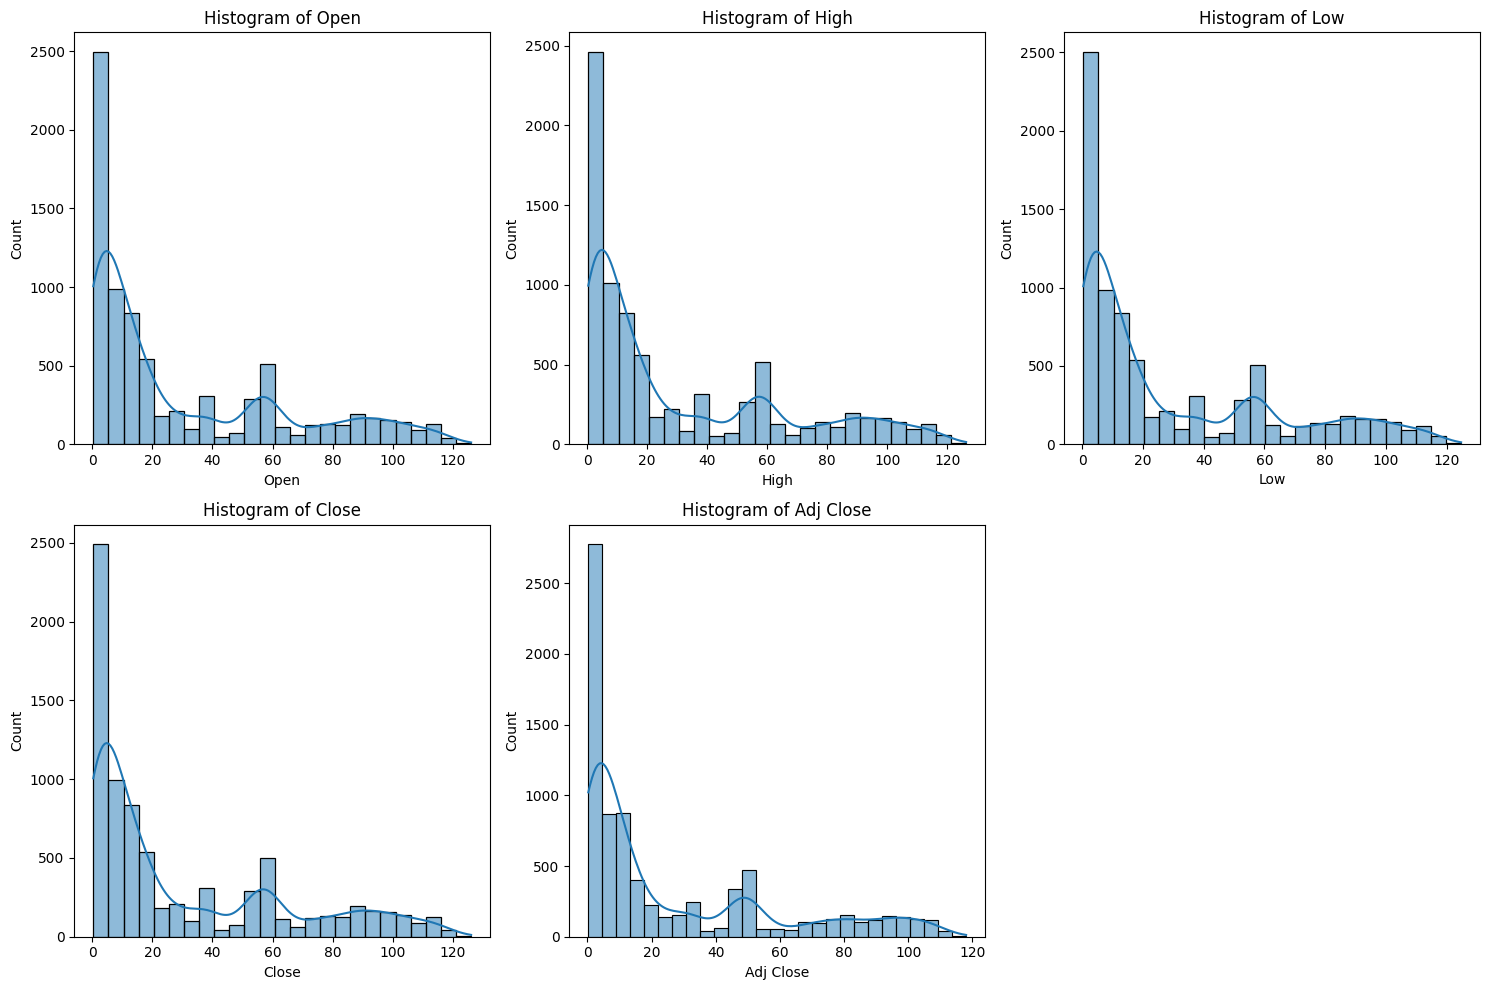

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(".//static//csv//sd.csv")

# Выбираем числовые столбцы
numeric_columns = ['Open','High','Low','Close','Adj Close']

# Выбираем столбцы для анализа
columns_to_check = ['Open','High','Low','Close','Adj Close']

# Функция для подсчета выбросов
def count_outliers(df, columns):
    outliers_count = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Считаем количество выбросов
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_count[col] = len(outliers)
    
    return outliers_count

# Подсчитываем выбросы
outliers_count = count_outliers(df, columns_to_check)

# Выводим количество выбросов для каждого столбца
for col, count in outliers_count.items():
    print(f"Количество выбросов в столбце '{col}': {count}")
    
# Создаем гистограммы
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

Судя по диаграммам, количетв выбросов либо полностью отсутсвует, либо имеется в пределах допустимых значений. Теперь можно приступить к разбиению датасета на выборки, но теперь используем прописанные реализации методов приращения данных: 

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

label_encoder = LabelEncoder()

# Функция для применения oversampling
def apply_oversampling(X, y):
    oversampler = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = oversampler.fit_resample(X, y)
    return X_resampled, y_resampled

# Функция для применения undersampling
def apply_undersampling(X, y):
    undersampler = RandomUnderSampler(random_state=42)
    X_resampled, y_resampled = undersampler.fit_resample(X, y)
    return X_resampled, y_resampled

def split_stratified_into_train_val_test(
    df_input,
    stratify_colname="y",
    frac_train=0.6,
    frac_val=0.15,
    frac_test=0.25,
    random_state=None,
):
    """
    Splits a Pandas dataframe into three subsets (train, val, and test)
    following fractional ratios provided by the user, where each subset is
    stratified by the values in a specific column (that is, each subset has
    the same relative frequency of the values in the column). It performs this
    splitting by running train_test_split() twice.

    Parameters
    ----------
    df_input : Pandas dataframe
        Input dataframe to be split.
    stratify_colname : str
        The name of the column that will be used for stratification. Usually
        this column would be for the label.
    frac_train : float
    frac_val   : float
    frac_test  : float
        The ratios with which the dataframe will be split into train, val, and
        test data. The values should be expressed as float fractions and should
        sum to 1.0.
    random_state : int, None, or RandomStateInstance
        Value to be passed to train_test_split().

    Returns
    -------
    df_train, df_val, df_test :
        Dataframes containing the three splits.
    """

    if frac_train + frac_val + frac_test != 1.0:
        raise ValueError(
            "fractions %f, %f, %f do not add up to 1.0"
            % (frac_train, frac_val, frac_test)
        )

    if stratify_colname not in df_input.columns:
        raise ValueError("%s is not a column in the dataframe" % (stratify_colname))

    X = df_input  # Contains all columns.
    y = df_input[
        [stratify_colname]
    ]  # Dataframe of just the column on which to stratify.

    # Split original dataframe into train and temp dataframes.
    df_train, df_temp, y_train, y_temp = train_test_split(
        X, y, stratify=y, test_size=(1.0 - frac_train), random_state=random_state
    )

    # Split the temp dataframe into val and test dataframes.
    relative_frac_test = frac_test / (frac_val + frac_test)
    df_val, df_test, y_val, y_test = train_test_split(
        df_temp,
        y_temp,
        stratify=y_temp,
        test_size=relative_frac_test,
        random_state=random_state,
    )

    assert len(df_input) == len(df_train) + len(df_val) + len(df_test)

    return df_train, df_val, df_test

In [18]:
data = df[["Volume", "High", "Low"]].copy()
data["Volume_Grouped"] = pd.cut(data["Volume"], bins=50, labels=False)

interval_counts = data["Volume_Grouped"].value_counts().sort_index()

min_samples_per_interval = 5
for interval, count in interval_counts.items():
    if count < min_samples_per_interval:
        data.loc[data["Volume_Grouped"] == interval, "Volume_Grouped"] = -1


df_coffee_train, df_coffee_val, df_coffee_test = split_stratified_into_train_val_test(
    data, stratify_colname="Volume_Grouped", frac_train=0.60, frac_val=0.20, frac_test=0.20)

print("Обучающая выборка: ", df_coffee_train.shape)
print(df_coffee_train["Volume_Grouped"].value_counts())

X_resampled, y_resampled = apply_oversampling(df_coffee_train, df_coffee_train["Volume_Grouped"])
df_coffee_train_adasyn = pd.DataFrame(X_resampled)

print("Обучающая выборка после oversampling: ", df_coffee_train_adasyn.shape)
print(df_coffee_train_adasyn["Volume_Grouped"].value_counts())

print("Контрольная выборка: ", df_coffee_val.shape)
print(df_coffee_val["Volume_Grouped"].value_counts())

print("Тестовая выборка: ", df_coffee_test.shape)
print(df_coffee_test["Volume_Grouped"].value_counts())

Обучающая выборка:  (4821, 4)
Volume_Grouped
 0    2802
 1    1460
 2     369
 3     111
 4      40
 5      18
-1      10
 6       7
 7       4
Name: count, dtype: int64
Обучающая выборка после oversampling:  (25218, 4)
Volume_Grouped
 0    2802
 2    2802
 1    2802
 5    2802
 3    2802
 4    2802
 7    2802
-1    2802
 6    2802
Name: count, dtype: int64
Контрольная выборка:  (1607, 4)
Volume_Grouped
 0    934
 1    487
 2    123
 3     37
 4     13
 5      6
-1      4
 6      2
 7      1
Name: count, dtype: int64
Тестовая выборка:  (1608, 4)
Volume_Grouped
 0    934
 1    487
 2    124
 3     37
 4     14
 5      6
-1      3
 6      2
 7      1
Name: count, dtype: int64


Выборка сбалансирована

## 3-й Датасет: Supermarket store branches sales analysis

Супермаркет - это магазин самообслуживания, предлагающий широкий ассортимент продуктов питания, напитков и товаров для дома, организованный по разделам. Этот магазин больше и имеет более широкий выбор, чем предыдущие продуктовые магазины, но меньше по размеру и более ограничен в ассортименте товаров, чем гипермаркет или рынок больших коробок. Однако в повседневном использовании в США термин "продуктовый магазин" является синонимом слова "супермаркет" и не используется для обозначения других типов магазинов, торгующих продуктами.

* Из описания датасета очевидно, что объектами иследования являются магазины.
* Атрибуты объектов: Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
* Очевидная цель этого датасета - научиться предсказывать объем продаж на основе таких характеристик, как площадь магазина и другие факторы.

В качестве примера бизнес-целей можно привести:
* Оптимизация работы магазинов. Это может включать выявление тех характеристик магазинов (например, площадь, местоположение), которые наиболее сильно влияют на уровень продаж, и разработку стратегий для повышения этих продаж на основе этих факторов.
* Другая возможная цель заключается в расширении или перемещении магазинов, где данные могут использоваться для принятия решений о выборе местоположений, оптимальном использовании пространства и планировке магазинов для максимизации продаж.
* Также может быть целью управление запасами и ресурсами, поскольку понимание того, как площадь магазина влияет на объем продаж, поможет лучше управлять запасами и распределением ресурсов.

In [19]:
import pandas as pd
df = pd.read_csv(".//static//csv//Stores.csv", sep=",")
print('количество колонок: ' + str(df.columns.size))  
print('колонки: ' + ', '.join(df.columns))

df.info()
df.head()

количество колонок: 5
колонки: Store ID , Store_Area, Items_Available, Daily_Customer_Count, Store_Sales
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


Store ID   Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
0          1        1659             1961                   530        66490
1          2        1461             1752                   210        39820
2          3        1340             1609                   720        54010
3          4        1451             1748                   620        53730
4          5        1770             2111                   450        46620

# Получение сведений о пропущенных данных

Типы пропущенных данных:

* None - представление пустых данных в Python
* NaN - представление пустых данных в Pandas
* '' - пустая строка

In [20]:
# Количество пустых значений признаков
print(df.isnull().sum())

print()

# Есть ли пустые значения признаков
print(df.isnull().any())

print()

# Процент пустых значений признаков
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df) * 100
    if null_rate > 0:
        print(f"{i} процент пустых значений: %{null_rate:.2f}")

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

Store ID                False
Store_Area              False
Items_Available         False
Daily_Customer_Count    False
Store_Sales             False
dtype: bool



Судя по статистике выше, пустые значения отсутсвуют. Проверим датасет на выбросы:

Количество выбросов в столбце 'Store_Area': 5
Количество выбросов в столбце 'Items_Available': 5
Количество выбросов в столбце 'Daily_Customer_Count': 3
Количество выбросов в столбце 'Store_Sales': 1


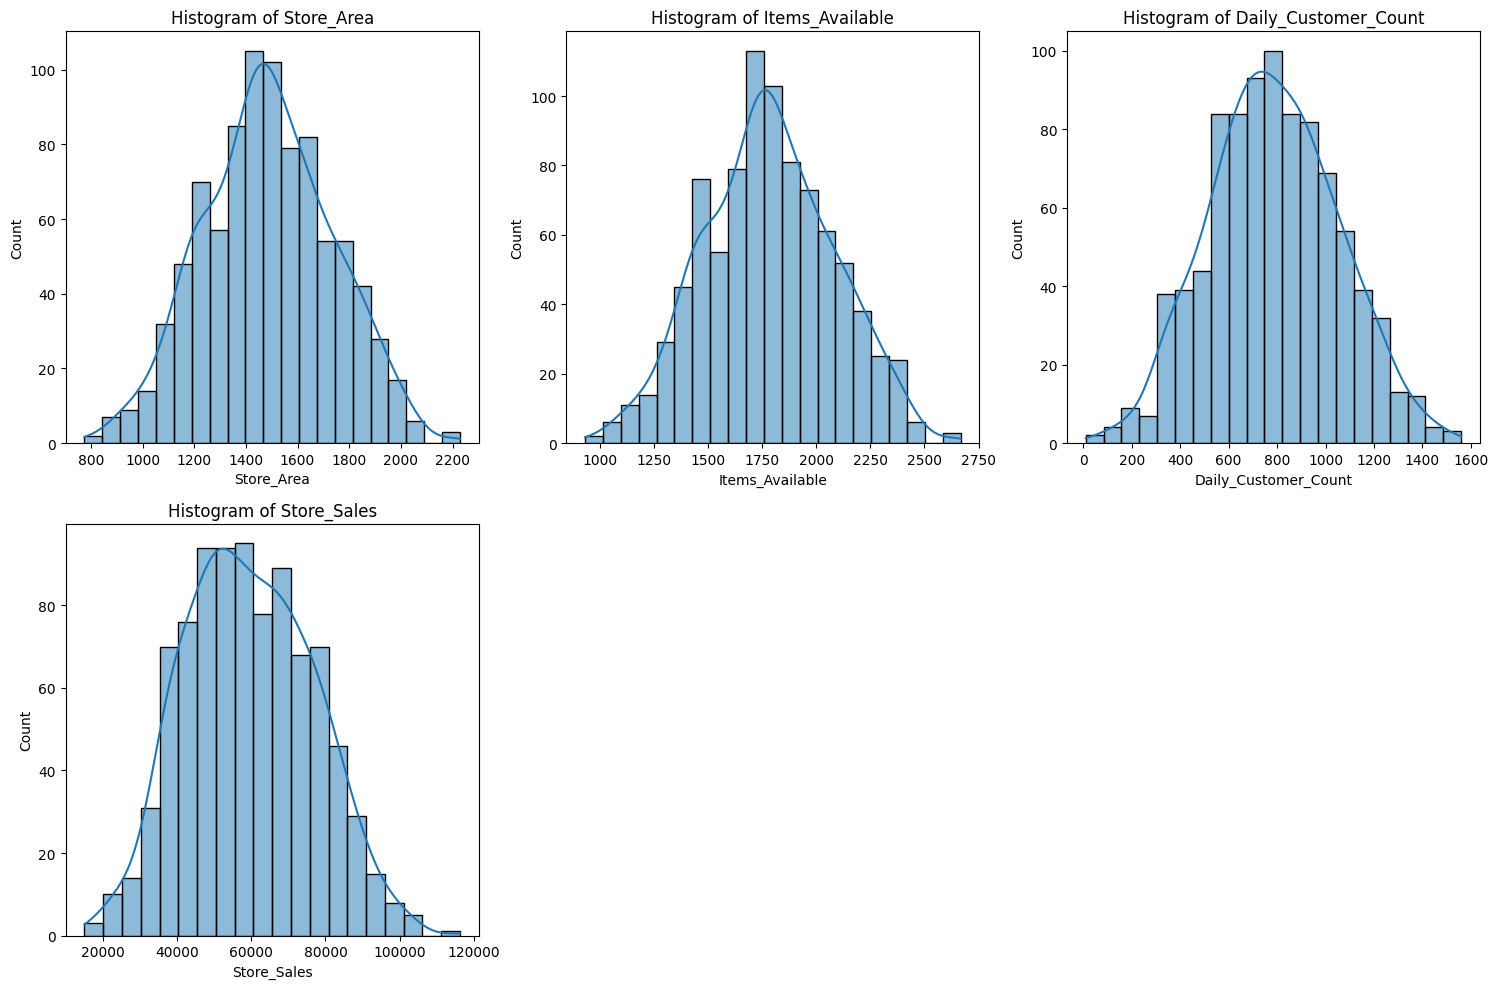

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(".//static//csv//Stores.csv")

# Выбираем числовые столбцы
numeric_columns = ['Store_Area','Items_Available','Daily_Customer_Count','Store_Sales']

# Выбираем столбцы для анализа
columns_to_check = ['Store_Area','Items_Available','Daily_Customer_Count','Store_Sales']

# Функция для подсчета выбросов
def count_outliers(df, columns):
    outliers_count = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Считаем количество выбросов
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_count[col] = len(outliers)
    
    return outliers_count

# Подсчитываем выбросы
outliers_count = count_outliers(df, columns_to_check)

# Выводим количество выбросов для каждого столбца
for col, count in outliers_count.items():
    print(f"Количество выбросов в столбце '{col}': {count}")
    
# Создаем гистограммы
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

Судя по диаграммам, количетв выбросов либо полностью отсутсвует, либо имеется в пределах допустимых значений. Теперь можно приступить к разбиению датасета на выборки: 

In [22]:
data = df[["Store_Sales", "Store_Area", "Daily_Customer_Count"]].copy()
data["Sales_Grouped"] = pd.cut(data["Store_Sales"], bins=6, labels=False)

interval_counts = data["Sales_Grouped"].value_counts().sort_index()

min_samples_per_interval = 10
for interval, count in interval_counts.items():
    if count < min_samples_per_interval:
        data.loc[data["Sales_Grouped"] == interval, "Sales_Grouped"] = -1

df_shop_train, df_shop_val, df_shop_test = split_stratified_into_train_val_test(
    data, stratify_colname="Sales_Grouped", frac_train=0.60, frac_val=0.20, frac_test=0.20)


print("Обучающая выборка: ", df_shop_train.shape)
print(df_shop_train["Sales_Grouped"].value_counts())

X_resampled, y_resampled = apply_oversampling(df_shop_train, df_shop_train["Sales_Grouped"])
df_shop_train_adasyn = pd.DataFrame(X_resampled)

print("Обучающая выборка после oversampling: ", df_shop_train_adasyn.shape)
print(df_shop_train_adasyn["Sales_Grouped"].value_counts())

print("Контрольная выборка: ", df_shop_val.shape)
print(df_shop_val["Sales_Grouped"].value_counts())

print("Тестовая выборка: ", df_shop_test.shape)
print(df_shop_test["Sales_Grouped"].value_counts())

Обучающая выборка:  (537, 4)
Sales_Grouped
 2    184
 3    148
 1    135
 4     45
 0     20
-1      5
Name: count, dtype: int64
Обучающая выборка после oversampling:  (1104, 4)
Sales_Grouped
 1    184
 2    184
 3    184
 4    184
 0    184
-1    184
Name: count, dtype: int64
Контрольная выборка:  (179, 4)
Sales_Grouped
 2    61
 3    49
 1    45
 4    15
 0     7
-1     2
Name: count, dtype: int64
Тестовая выборка:  (180, 4)
Sales_Grouped
 2    61
 3    50
 1    45
 4    15
 0     7
-1     2
Name: count, dtype: int64


Выборка сбалансирована